In [2]:
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Fix seed
np.random.seed(123)

# Generate a set of 10 nodes in [0,1]^2
intensity = 15 # lambda parameter for Poisson distribution
poisson_var = np.random.poisson(intensity)
nodes = np.random.rand(poisson_var, 2)
grid = 100
stepsize = 1.0/grid

# Toroidal distance
def toroidal_distance(point1, point2, size):
    diff = np.array([]).reshape(0,2)
    for i in range(3):
        for j in range(3):
            diff = np.vstack([diff, np.abs(point1 + np.array([(i-1)*size, (j-1)*size]) - point2)])
    return np.min(np.linalg.norm(diff, axis=1))

# Define a function that calculates the distance from each point in [0,1]^2 to the closest node of the sampled set
def distance_to_nodes(x, y):
    distances = np.array([]).reshape(0,1)
    for node in nodes:
        distances = np.vstack([distances, toroidal_distance(np.array([x,y]), node, 1)])
    return np.min(distances)

# Evaluate the function at each point in [0,1]^2
x = np.linspace(0, 1, grid, endpoint=False)
y = np.linspace(0, 1, grid, endpoint=False)
x = x + stepsize*0.5
y = y + stepsize*0.5
Z = np.zeros((grid, grid))
start = time.time()
for i in range(grid):
    for j in range(grid):
        clear_output(wait=True)
        Z[i,j] = distance_to_nodes(x[i], y[j])
        print("current progress: row",i+1,"/",grid,"and column",j+1,"/",grid)

end = time.time()
print("Elapsed time: " + str(end - start) + " seconds")

current progress: row 100 / 100 and column 100 / 100
Elapsed time: 97.73943209648132 seconds


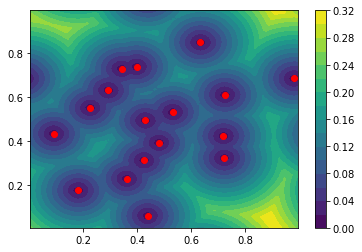

In [3]:
# Plot the function as a contour plot
X,Y = np.meshgrid(x,y)
plt.contourf(Y, X, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.scatter(nodes[:,0], nodes[:,1], c='red', marker='o')
plt.show()

In [9]:
tikz = ""

maximum = np.max(Z)
Color = np.zeros_like(Z)
squaresize = stepsize*0.5

for i in range(grid):
    for j in range(grid):
        Color[i,j] = np.multiply(np.divide(Z[i,j], maximum),100)
        tikz = tikz + "\\filldraw[color=black!{0:1.4f}!white, ".format(Color[i,j]) + "shift={" + "({0:1.4f}, {1:1.4f})".format(x[i], y[j]) + "}] (-" + str(squaresize) + ", -" + str(squaresize) + ") rectangle (" + str(squaresize) + ", " + str(squaresize) + ");\n"
        
for i in range(len(nodes)):
    tikz = tikz + "\\fill[red] ({0:1.4f}, {1:1.4f}) circle (0.008);\n".format(nodes[i,0],nodes[i,1])

# Open the output TikZ file
with open('contact_distances.tex', 'w') as f:
    # Write the TikZ code for the plot
    f.write(tikz)